# 서울시 구별 인구 현황

- 서울에서 인구수가 많으면 고령 비율도 높을까?
- http://stat.seoul.go.kr/jsp3/index.jsp

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import Image

sns.set()

%matplotlib inline

In [2]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

plt.rcParams['figure.figsize'] = (10,6)

from IPython.display import Image

In [3]:
reference = lambda file, w = None, h = None : \
    image(filename = file, width = w, height = h)

In [4]:
population_img = 'images/Report_seoul_population_2019_2Q.png'
population_xls = './data/Report_seoul_population_2019_2Q.xls'

In [5]:
# Image(population_img)

In [6]:
population = pd.read_excel(population_xls,
                          header = 2,
                          usecols = 'B,C, D,M, N') # colname으로 사용할 셀 값 지정
population.head()

,자치구,세대,계,세대당인구,65세이상고령자
0,합계,4304243,10041574,2.27,1451564
1,종로구,73828,162413,2.06,27155
2,중구,62156,136276,2.03,22749
3,용산구,109692,245069,2.09,38259
4,성동구,136872,312991,2.23,43370


In [7]:

# unique확인
population['자치구'].unique()

array(['합계', '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구',
       '강북구', '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구',
       '금천구', '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'],
      dtype=object)

In [8]:
# nan 부분 drop
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 5 columns):
자치구         26 non-null object
세대          26 non-null int64
계           26 non-null int64
세대당인구       26 non-null float64
65세이상고령자    26 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 1.1+ KB


In [9]:
population.isna().sum()

자치구         0
세대          0
계           0
세대당인구       0
65세이상고령자    0
dtype: int64

In [10]:
population = population.drop([0])
population

,자치구,세대,계,세대당인구,65세이상고령자
1,종로구,73828,162413,2.06,27155
2,중구,62156,136276,2.03,22749
3,용산구,109692,245069,2.09,38259
4,성동구,136872,312991,2.23,43370
5,광진구,163914,369470,2.16,46773
6,동대문구,162851,363101,2.13,58078
7,중랑구,181383,405639,2.21,63670
8,성북구,190253,452292,2.31,69341
9,강북구,143650,319377,2.20,59189
10,도봉구,138460,339001,2.43,57367


In [11]:
population.columns

Index(['자치구', '세대', '계', '세대당인구', '65세이상고령자'], dtype='object')

In [12]:
# column명 수정
population.rename(columns = {'계': '인구수'}, inplace = True)
population.rename(columns = {'자치구': '구'}, inplace = True)
population.head()

,구,세대,인구수,세대당인구,65세이상고령자
1,종로구,73828,162413,2.06,27155
2,중구,62156,136276,2.03,22749
3,용산구,109692,245069,2.09,38259
4,성동구,136872,312991,2.23,43370
5,광진구,163914,369470,2.16,46773


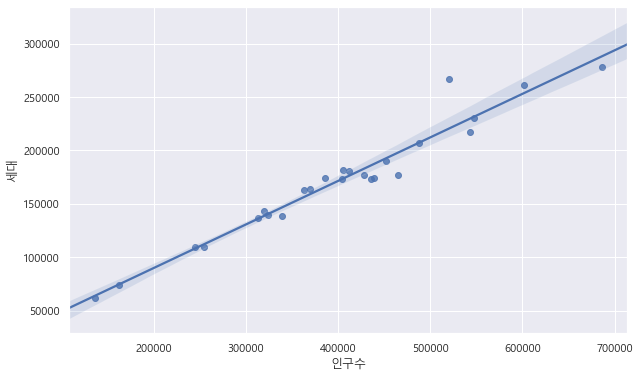

In [13]:
# 회귀 곡선 그리기
sns.regplot(x = '인구수', y = '세대', data = population)

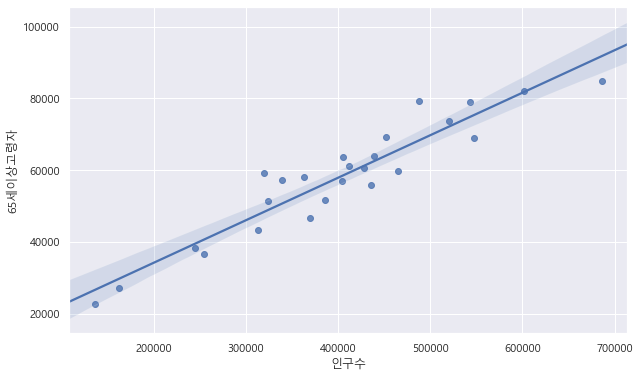

In [14]:
sns.regplot(x='인구수', y = '65세이상고령자', data = population)

In [15]:
import json
import folium
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)


- 구별 인구수 그리기ㅡ


In [16]:
# 각 구별로 위치정보를 갖고 있는 데이터
geo_path = 'data/skorea_municipalities_geo_simple.json'

geo_str = json.load(open(geo_path, encoding='utf-8'))
# geo_str

In [21]:
guDat = pd.DataFrame({'gu': population['구'],
                     'counts': population['인구수']})
guDat.head()

,gu,counts
1,종로구,162413
2,중구,136276
3,용산구,245069
4,성동구,312991
5,광진구,369470


In [18]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')
map

In [23]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data=geo_str,
              data=guDat,
              columns=['gu', 'counts'],
              fill_color='YlGnBu', #PuRd, YlGnBu
              key_on='feature.id')
map

In [25]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data=geo_str,
              data=guDat,
              columns=['gu', 'counts'],
              fill_color='PuRd', #PuRd, YlGnBu
              key_on='feature.id')
map

- 구별 65세 이상 고령자

In [27]:
guDat = pd.DataFrame({'gu': population['구'],
                     'counts': population['65세이상고령자']})

map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data = geo_str,
              data = guDat,
              columns = ['gu','counts'],
              fill_color = 'PuRd',
              key_on = 'feature.id')
map

- 구별 세대당 인구 

In [30]:
guDat = pd.DataFrame({'gu': population['구'],
                     'counts': population['세대당인구']})

map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data = geo_str,
              data = guDat,
              columns = ['gu','counts'],
              fill_color = 'PuRd',
              key_on='feature.id')

map

- 고령자 비율= 65세이상 고령자/인구수 * 100

In [ ]:
population['고령비율'] = population['65세이상고령자'] / population['인구수'] * 100
population.head()

In [31]:
guDat = pd.DataFrame({'gu':population['구'], 'counts':population['고령비율']})

map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data=geo_str,
              data=guDat,
              columns=['gu', 'counts'],
              fill_color='PuRd', #PuRd, YlGnBu
              key_on='feature.id')
map

KeyError: '고령비율'